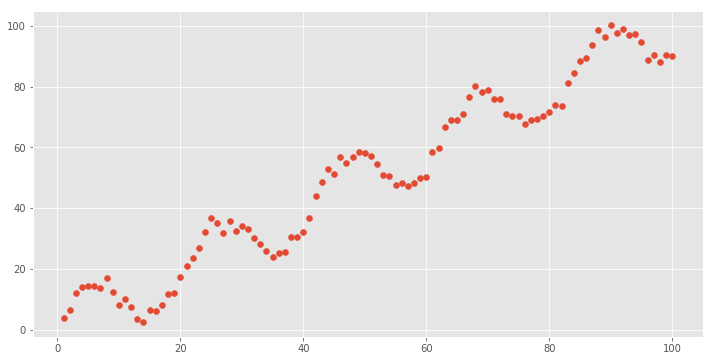

In [56]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from math import *
import matplotlib.pyplot as plt
import matplotlib as mpl
x = np.arange(1,101) # 1 到 100
x = np.array([float(i) for i in x])
y =x+[10*sin(0.3*i)for i in x]+stats.norm.rvs(size=100, loc=0, scale=1.5)
# plt.plot(x, y,'b*')
# plt.show()

plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.show()

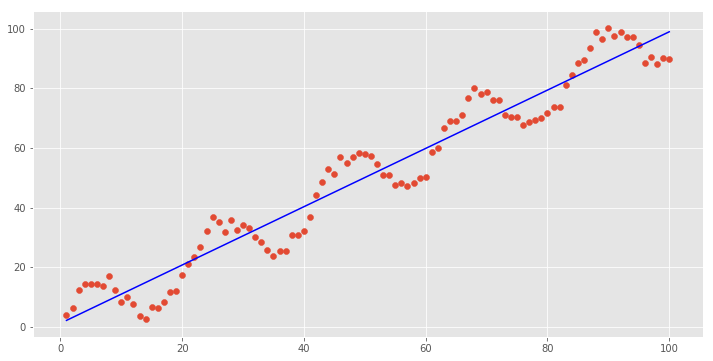

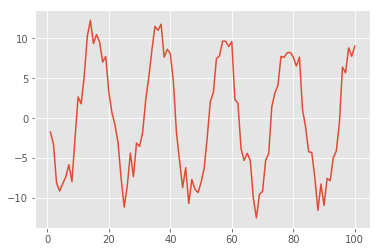

y = 1.190061335199637 + 0.977836207340503 * x


In [57]:
# 先用普通最小二乘回归来处理：
slope, intercept, r_value, p_value, std_err =  stats.linregress(x, y)
plt.figure(figsize=(12, 6))
y_Hat_linear = intercept + slope * x
plt.ion()
plt.plot(x, y_Hat_linear,'b')
plt.scatter(x, y)
plt.show()
plt.figure()
plt.plot(x, y_Hat_linear - y)  #用构建的模型绘制残差图，若在x轴两侧出现了明显的规律分布，说明存在异方差性。
plt.show()
print('y = {0} + {1} * x'.format(intercept, slope))

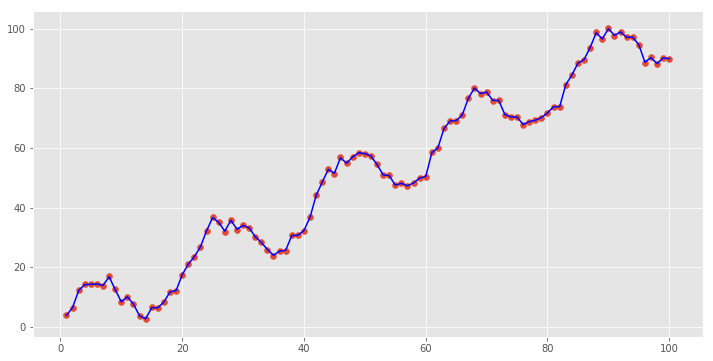

In [58]:
# 实现局部加权最小二乘法——关键在于理解高斯核函数（对每个点做预测时都必须使用整个数据集）
import statsmodels.api as sm
def calculate_kernel(X,i,k):
    w = np.exp((X[i] - X)**2/(-2*k*k))
    return w
def My_WLS(k):
    yHat2=np.zeros(len(x))
    for i in range(len(x)):
        #把加权最小二乘转化为普通最小二乘
        w=calculate_kernel(x, i, k)
        x2=w*x # x*
        #x2=x2[x2>0]      #去掉样本权重为0的样本
        y2=w*y # y*
        #y2=y2[y2>0]
        X=np.zeros((1,len(x2)))
        X[0]=x2
        X=X.T
        X = sm.add_constant(X,has_constant='skip') #在X的左侧加上一列1，这样可以将b 项省略
        # X[:,0]=w[w>0] #把X第一列加上的全1 换成 w  有什么意义？？？？？？？？？？？？？
        Y=y2
        model = sm.OLS(Y, X)  # 注意: sm.OLS 不会假设回归模型有常数项
        results = model.fit()
        a = results.params[0]
        b = results.params[1]
        yHat2[i]=a+b*x[i]      #得到xi处的估计值
    return yHat2
    
#         beta = np.linalg.inv(X_.T.dot(X)).dot(X_.T).dot(Y_)
#         Y_hat[i] = X * beta

yHat2=My_WLS(0.5)  #ｋ取100000
plt.figure(figsize=(12,6))
plt.plot(x,yHat2,'b')
plt.scatter(x,y)

In [59]:
data=pd.DataFrame()
data['y']=y
data['yHatLinear']=y_Hat_linear
data['yHat2']=yHat2
data.head()

,y,yHatLinear,yHat2
0,3.902820,2.167898,3.855167
1,6.402383,3.145734,6.477267
2,12.249964,4.123570,12.180702
3,14.221905,5.101406,14.166262
4,14.282734,6.079242,14.264161


In [ ]:
# 进行 cross-validation 选择最佳的k